In [30]:
# Data representation and computation
import pandas as pd  
import numpy as np  
pd.options.display.float_format = '{:20,.4f}'.format

# Graph plotting
import matplotlib.pyplot as plt  
import seaborn as sns
from matplotlib import pyplot


# Arima
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# Miscellaneous
import warnings
from math import log, e, ceil
from scipy.stats import entropy
#from prettytable import PrettyTable

# Declaration
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
sns.set(font_scale=1)

In [3]:
file_path = "Resources/Sales_Data - Only the columns we need.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [4]:
sales_df.shape

(35948, 16)

In [5]:
# The data is of a particular time period. 
# To read the data as a time series, we have to pass special arguments to the read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

In [6]:
sales_df = pd.read_csv(file_path, parse_dates=['InvDate'], date_parser = dateparse)
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.6000
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,"2,731.5200"
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.8000
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.2000
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.4000


In [7]:
sales_df.shape

(35948, 16)

In [8]:
sales_df.describe()

,YEAR_,MONTH_,Product,Real_Qty,CAD_Value
count,"35,948.0000","35,948.0000","35,948.0000","35,948.0000","35,948.0000"
mean,"2,016.8881",6.5288,"600,743.3911",60.0658,"4,029.2229"
std,2.5006,3.2983,313.4058,327.3413,"13,568.9165"
min,"2,013.0000",1.0000,"600,007.0000",1.0000,0.0000
25%,"2,015.0000",4.0000,"600,627.0000",2.0000,130.7000
50%,"2,017.0000",6.0000,"600,773.5000",5.0000,490.5600
75%,"2,019.0000",9.0000,"600,919.0000",28.0000,"2,105.5760"
max,"2,021.0000",12.0000,"601,307.0000","11,520.0000","261,584.6400"


In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR_        35948 non-null  int64         
 1   MONTH_       35948 non-null  int64         
 2   InvDate      35948 non-null  datetime64[ns]
 3   InvNumber    35948 non-null  object        
 4   Market       35948 non-null  object        
 5   InvCustomer  35948 non-null  object        
 6   CompanyName  35948 non-null  object        
 7   ItemClass    35948 non-null  object        
 8   SubCategory  35948 non-null  object        
 9   Flavours     35948 non-null  object        
 10  Product      35948 non-null  int64         
 11  Description  35948 non-null  object        
 12  Config       35948 non-null  object        
 13  UOM          35948 non-null  object        
 14  Real_Qty     35948 non-null  int64         
 15  CAD_Value    35948 non-null  float64       
dtypes: d

In [10]:
sales_df.isna().sum()

YEAR_          0
MONTH_         0
InvDate        0
InvNumber      0
Market         0
InvCustomer    0
CompanyName    0
ItemClass      0
SubCategory    0
Flavours       0
Product        0
Description    0
Config         0
UOM            0
Real_Qty       0
CAD_Value      0
dtype: int64

In [11]:
sales_df.groupby('SubCategory')['CAD_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
SubCategory,,,,,,,,
CHOC,"1,102.0000","2,182.6657","5,869.2311",0.0000,268.1800,536.3600,"2,395.8264","95,988.0000"
F&N,"30,261.0000","4,399.6510","14,199.5907",0.0000,134.0900,536.3600,"2,227.4560","261,584.6400"
GRAN,"3,388.0000","1,538.4345","6,225.9932",0.0000,9.1000,34.5600,777.6000,"94,027.2000"
LSUG,647.0000,278.9067,407.2594,0.0000,100.8000,201.1400,302.4000,"6,350.4000"
PROT,550.0000,"7,103.0887","23,553.7860",0.0000,166.4000,456.7680,998.4000,"176,256.0000"


In [12]:
sales_df.groupby('SubCategory')['Real_Qty','CAD_Value'].sum()
#sales.df.groupby('Market')['Customers', 'Sales'].sum()

,Real_Qty,CAD_Value
SubCategory,,
CHOC,19222,"2,405,297.6046"
F&N,1609668,"133,137,839.6553"
GRAN,304879,"5,212,216.0100"
LSUG,1802,"180,452.6500"
PROT,223674,"3,906,698.7880"


In [45]:
# sales for the CAN Market
sales = sales_df[sales_df.Market == "CAN"].loc[:,["InvDate","CAD_Value"]]

# reverse to the order: from 2013 to 2021
sales = sales.sort_index(ascending = False)

# to datetime64
sales['InvDate'] = pd.DatetimeIndex(sales['InvDate'])
sales.dtypes

InvDate      datetime64[ns]
CAD_Value           float64
dtype: object

In [46]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'InvDate': 'ds',
                                'CAD_Value': 'y'})
sales.head()

,ds,y
35947,2021-06-29,28.9900
35946,2021-06-29,57.9800
35945,2021-06-29,4.9900
35944,2021-06-29,28.9900
35943,2021-06-29,"15,924.0000"


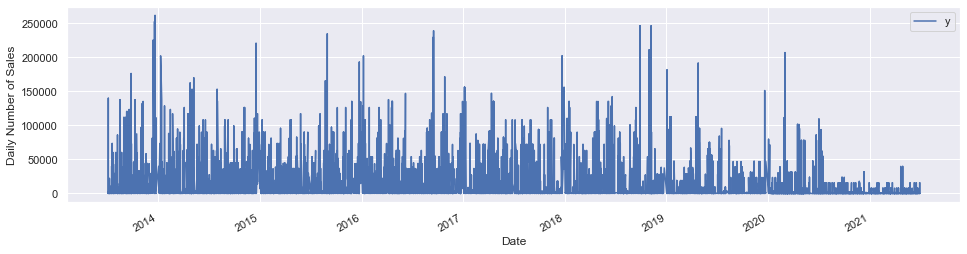

In [47]:
# Plot Daily Sales for CAN Market
ax = sales.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)
    if df_results[0] < df_test[4]["5%"]:
        print("Reject Ho -- Time Series is Stationary.")
    else:
        print('Failed to Reject Ho -- Time Series is Stationary.')

In [60]:
# Converting dataframe to Series
Sales_series = pd.Series(sales_df.Real_Qty,index = sales_df.index)
type(Sales_series)

pandas.core.series.Series

In [61]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)
    if df_results[0] < df_test[4]["5%"]:
        print("Reject Ho -- Time Series is Stationary.")
    else:
        print('Failed to Reject Ho -- Time Series is Stationary.')

In [62]:
adfuller_test(Sales_series)

Test Statistic                     -21.7423
p-value                              0.0000
Lags                                51.0000
Observations                    35,896.0000
Critical Value (1%)                 -3.4305
Critical Value (5%)                 -2.8616
Critical Value (10%)                -2.5668
dtype: float64
Reject Ho -- Time Series is Stationary.


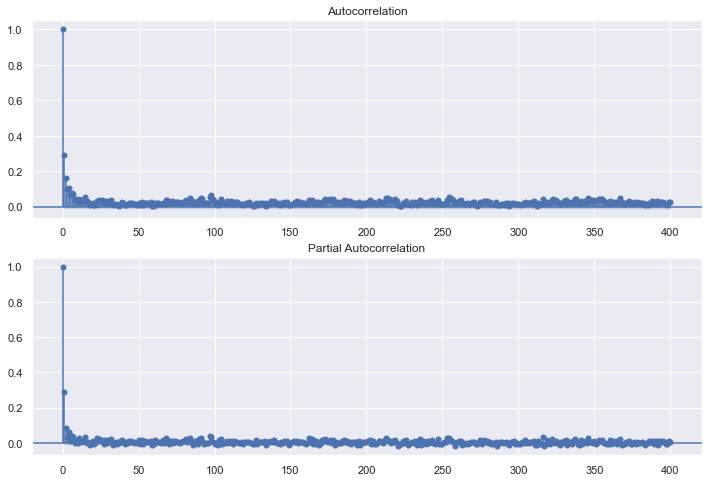

In [71]:
import statsmodels.api as sm  
# ACF, PACF graphs to help determine order of ARIMA model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Sales_series, lags=400, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Sales_series, lags=400, ax=ax2)

In [64]:
Sales_Series_train = Sales_series[0:335]
Sales_Series_test = Sales_series[335:]

In [65]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sales_model = ARIMA(Sales_Series_train,order = (0,0,1))

In [66]:
sales_model_fit = sales_model.fit()

In [69]:
sales_forcast = sales_model_fit.forecast(steps = 35000)[0]

In [70]:
mean_squared_error(sales_forcast,Sales_Series_test.values)

ValueError: Found input variables with inconsistent numbers of samples: [35000, 35613]